[Summary of the file](#summary-of-video-game-reviews-analysis)

# 🎮 Video Game Reviews Data Analysis  

## 📝 Problem Statement  
The video game industry is a multi-billion-dollar market with thousands of games released every year. Understanding **user ratings, pricing strategies, platform performance, and quality metrics** is crucial for game developers, publishers, and marketers. This project aims to **analyze video game ratings, explore factors affecting user satisfaction, and uncover trends across different platforms, genres, and price ranges**.  

Key objectives include:  
- Identifying **top-rated and lowest-rated games**.  
- Analyzing **trends in game quality (graphics, soundtrack, story, and gameplay)**.  
- Understanding **the impact of pricing on ratings**.  
- Examining **platform and genre-wise performance**.  
- Extracting insights from **user reviews** using NLP techniques.  

---

## 📊 Dataset Description  
This dataset consists of **47,774 video game records**, covering various attributes such as **ratings, price, platform, genre, quality scores, and user reviews**. It helps in analyzing **game performance, user preferences, and industry trends**.  

##### **📌 Total Records:** 47,774  
##### **📌 Total Columns:** 18  

---

## 📖 Data Dictionary  

| #  | Column Name               | Data Type  | Description |
|----|--------------------------|------------|----------------------------------------------------|
| 1  | `Game Title`             | object     | Name of the video game. |
| 2  | `User Rating`            | float64    | Average rating given by users (0-10 scale). |
| 3  | `Age Group Targeted`     | object     | The age group for which the game is designed (e.g., Teen, Everyone). |
| 4  | `Price`                  | float64    | Price of the game in USD. |
| 5  | `Platform`               | object     | The gaming platform (e.g., PC, PlayStation, Xbox, Nintendo, Mobile). |
| 6  | `Requires Special Device`| object     | Whether the game requires special equipment (e.g., VR, Motion Controllers). |
| 7  | `Developer`              | object     | The company that developed the game. |
| 8  | `Publisher`              | object     | The company that published the game. |
| 9  | `Release Year`           | int64      | The year the game was released. |
| 10 | `Genre`                  | object     | The category of the game (e.g., Action, Adventure, RPG). |
| 11 | `Multiplayer`            | object     | Whether the game supports multiplayer mode (Yes/No). |
| 12 | `Game Length (Hours)`    | float64    | Approximate number of hours required to complete the game. |
| 13 | `Graphics Quality`       | object     | User rating for game graphics (e.g., Low, Medium, High, Ultra). |
| 14 | `Soundtrack Quality`     | object     | User rating for game soundtrack (e.g., Poor, Good, Excellent). |
| 15 | `Story Quality`          | object     | User rating for game storyline (e.g., Poor, Good, Excellent). |
| 16 | `User Review Text`       | object     | Text-based user reviews for sentiment analysis. |
| 17 | `Game Mode`              | object     | Type of gameplay (e.g., Single-Player, Multiplayer, Co-op). |
| 18 | `Min Number of Players`  | int64      | Minimum number of players required to play the game. |

---

## 🏆 Expected Insights  
By performing **exploratory data analysis (EDA)**, we expect to uncover:  
✅ **Top-rated games** across different platforms & genres.  
✅ **How price influences game ratings**.  
✅ **Best performing developers & publishers**.  
✅ **Impact of graphics, soundtrack, and story quality on user ratings**.  
✅ **Trends in multiplayer vs single-player preferences**.  
✅ **NLP-based sentiment analysis on user reviews**.  

---

## 📌 Next Steps  
1️⃣ **Load the dataset into Python using Pandas.**  
2️⃣ **Perform data cleaning (handle missing values, duplicates, outliers).**  
3️⃣ **Conduct EDA (statistical analysis, visualization, and trend analysis).**  
4️⃣ **Build visualizations using Matplotlib & Seaborn.**  
5️⃣ **Apply NLP techniques on User Reviews.**  

🚀 **Let's start analyzing the video game industry!** 🎮


import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sma
from sklearn.preprocessing import LabelEncoder,PowerTransformer,StandardScaler,RobustScaler

import warnings
warnings.filterwarnings('ignore')

In [237]:
data=pd.read_csv('video_game_reviews.csv')
data.head()

,Game Title,User Rating,Age Group Targeted,Price,Platform,Requires Special Device,Developer,Publisher,Release Year,Genre,Multiplayer,Game Length (Hours),Graphics Quality,Soundtrack Quality,Story Quality,User Review Text,Game Mode,Min Number of Players
0,Grand Theft Auto V,36.4,All Ages,41.41,PC,No,Game Freak,Innersloth,2015,Adventure,No,55.3,Medium,Average,Poor,"Solid game, but too many bugs.",Offline,1
1,The Sims 4,38.3,Adults,57.56,PC,No,Nintendo,Electronic Arts,2015,Shooter,Yes,34.6,Low,Poor,Poor,"Solid game, but too many bugs.",Offline,3
2,Minecraft,26.8,Teens,44.93,PC,Yes,Bungie,Capcom,2012,Adventure,Yes,13.9,Low,Good,Average,"Great game, but the graphics could be better.",Offline,5
3,Bioshock Infinite,38.4,All Ages,48.29,Mobile,Yes,Game Freak,Nintendo,2015,Sports,No,41.9,Medium,Good,Excellent,"Solid game, but the graphics could be better.",Online,4
4,Half-Life: Alyx,30.1,Adults,55.49,PlayStation,Yes,Game Freak,Epic Games,2022,RPG,Yes,13.2,High,Poor,Good,"Great game, but too many bugs.",Offline,1


In [238]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47774 entries, 0 to 47773
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Game Title               47774 non-null  object 
 1   User Rating              47774 non-null  float64
 2   Age Group Targeted       47774 non-null  object 
 3   Price                    47774 non-null  float64
 4   Platform                 47774 non-null  object 
 5   Requires Special Device  47774 non-null  object 
 6   Developer                47774 non-null  object 
 7   Publisher                47774 non-null  object 
 8   Release Year             47774 non-null  int64  
 9   Genre                    47774 non-null  object 
 10  Multiplayer              47774 non-null  object 
 11  Game Length (Hours)      47774 non-null  float64
 12  Graphics Quality         47774 non-null  object 
 13  Soundtrack Quality       47774 non-null  object 
 14  Story Quality         

**Inferences :**
1. There are 3 data type of data in the columns which are [object, integer, float].
2. `User Rating` and `Price` will be our target variabe and our most focus will be on it.
3. Data `does not have null` values.

In [239]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
User Rating,47774.0,29.719329,7.550131,10.10,24.30,29.700,35.1000,49.50
Price,47774.0,39.951371,11.520342,19.99,29.99,39.845,49.9575,59.99
Release Year,47774.0,2016.480952,4.027276,2010.00,2013.00,2016.000,2020.0000,2023.00
Game Length (Hours),47774.0,32.481672,15.872508,5.00,18.80,32.500,46.3000,60.00
Min Number of Players,47774.0,5.116758,2.769521,1.00,3.00,5.000,7.0000,10.00


**Inferences :**
1. `User Rating` lies in the range 10 to 50 and in the float format.
2. `Price` ranges from 19 to 59 dolors (taking the standard Currency unit)
3. Our data contains `records from 2010 to 2023`.
4. We have games that can take from `5 hours to upto 60 hours` which include all the short, medium and long completition time.
5. We have solo player to multiplayer games.
6. There is a possibility that longer games tends to more price and high rating.
7. There is also a great chance that Multiplayer games are priced more than siingle player.
8. We have to also check weather with time prices for the games increases or not.
9. There is also a great chance that the multiplayer games have higher ratings.
10. Maybe the Rating of the game also affecting the Price of the game.

In [240]:
data.select_dtypes(object).describe().T

,count,unique,top,freq
Game Title,47774,40,Pokémon Scarlet & Violet,1274
Age Group Targeted,47774,4,Teens,12038
Platform,47774,5,PlayStation,9633
Requires Special Device,47774,2,No,23887
Developer,47774,10,Bungie,4877
Publisher,47774,9,Capcom,5406
Genre,47774,10,RPG,4873
Multiplayer,47774,2,No,24090
Graphics Quality,47774,4,High,12113
Soundtrack Quality,47774,4,Excellent,12036


**Inferences :**
1. Most Played game is `Pokémon Scarlet & Violet`.
2. `Teenagers are tends to play more games` then other age group.
3. People pay these games on `Playstation` more than on other platforms.
4. Most of the games `does not require special devices`.
5. `Bungie Developers` are the ones that have developed most of the games in the last decade.
6. Most of the games are `Solo Player` games with high `High Graphic Quality`.
7. Most of the Games are `Offline`.
8. Malourity of Population recomends to improove the Graphic Quality.
9. People Don't like the story of these games.
10. People `Love to play RPG Genre` games.

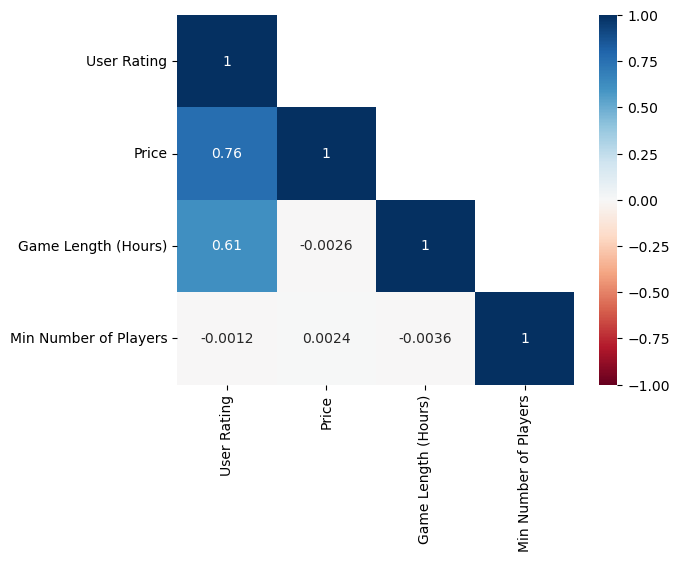

In [241]:
sns.heatmap(data=data.drop(columns='Release Year').corr(numeric_only=True,method='spearman'),cmap='RdBu',
            vmin=-1,vmax=1,annot=True,
            mask=np.triu(data.drop(columns='Release Year').corr(numeric_only=True,method='spearman'),k=1))
plt.show()

**Inferences :**
1. User rating and Game length have +ve Correlation, Which confirms that long game length have higher Price and Higher user ratings we will satistically confirms it too.
2. No Other Columns except Price and user ratings is showing any correlation.
3. Price and user rating is also highly correlated.

In [242]:
cat_cols=['Age Group Targeted', 'Platform',
       'Requires Special Device', 'Developer', 'Publisher', 'Genre',
       'Multiplayer', 'Graphics Quality', 'Soundtrack Quality',
       'Story Quality', 'User Review Text', 'Game Mode']
cat_cols

['Age Group Targeted',
 'Platform',
 'Requires Special Device',
 'Developer',
 'Publisher',
 'Genre',
 'Multiplayer',
 'Graphics Quality',
 'Soundtrack Quality',
 'Story Quality',
 'User Review Text',
 'Game Mode']

In [243]:
for i in cat_cols:
    print(pd.crosstab(data[i],columns='Count').sort_values(by='Count',ascending=False))
    print('\n')

col_0               Count
Age Group Targeted       
Teens               12038
Kids                12013
All Ages            11954
Adults              11769


col_0            Count
Platform              
PlayStation       9633
PC                9599
Nintendo Switch   9596
Mobile            9589
Xbox              9357


col_0                    Count
Requires Special Device       
No                       23887
Yes                      23887


col_0           Count
Developer            
Bungie           4877
Game Freak       4876
Epic Games       4845
Capcom           4826
EA Sports        4826
Innersloth       4747
Rockstar Games   4736
Valve            4717
CD Projekt Red   4696
Nintendo         4628


col_0                 Count
Publisher                  
Capcom                 5406
Electronic Arts        5382
Activision             5360
Epic Games             5353
Valve                  5316
Take-Two Interactive   5269
Square Enix            5262
Nintendo               5226
Innersl

**Inference :** There is no significance difference between the different Classes

In [244]:
cat_cols

['Age Group Targeted',
 'Platform',
 'Requires Special Device',
 'Developer',
 'Publisher',
 'Genre',
 'Multiplayer',
 'Graphics Quality',
 'Soundtrack Quality',
 'Story Quality',
 'User Review Text',
 'Game Mode']

In [245]:
data.nunique()

Game Title                   40
User Rating                 392
Age Group Targeted            4
Price                      4001
Platform                      5
Requires Special Device       2
Developer                    10
Publisher                     9
Release Year                 14
Genre                        10
Multiplayer                   2
Game Length (Hours)         551
Graphics Quality              4
Soundtrack Quality            4
Story Quality                 4
User Review Text             12
Game Mode                     2
Min Number of Players         9
dtype: int64

In [246]:
data.drop(columns='Release Year',inplace=True)

In [247]:
num_cols=data.drop(columns=['Age Group Targeted',
 'Platform',
 'Requires Special Device',
 'Developer',
 'Publisher',
 'Genre',
 'Multiplayer',
 'Graphics Quality',
 'Soundtrack Quality',
 'Story Quality',
 'User Review Text',
 'Game Mode','Game Title']).columns

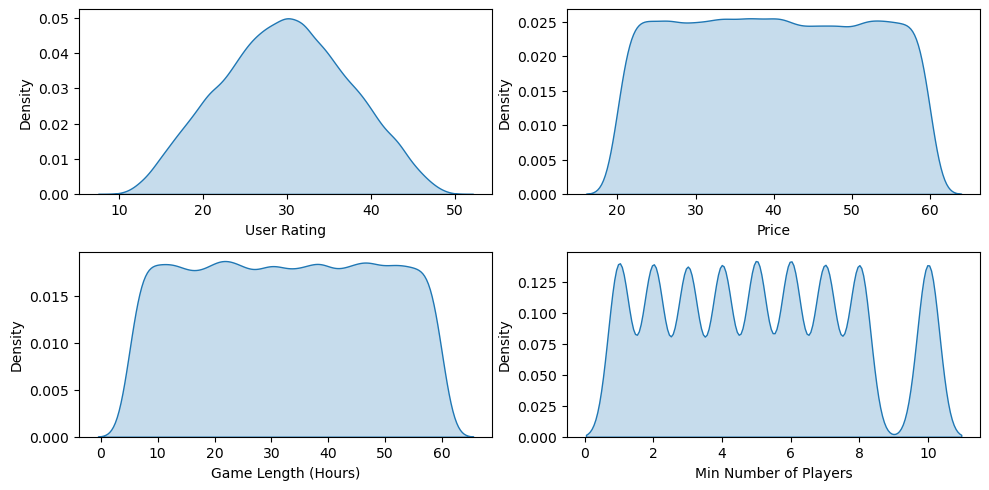

In [248]:
t=1
row=3
col=2
plt.figure(figsize=(10,7))
for i in num_cols:
    plt.subplot(row,col,t)
    sns.kdeplot(data=data,x=i,fill=True)
    t+=1
plt.tight_layout()
plt.show()

In [249]:
data[num_cols].kurtosis()+3

User Rating              2.405858
Price                    1.803349
Game Length (Hours)      1.797875
Min Number of Players    2.001687
dtype: float64

In [250]:
data[num_cols].skew()

User Rating              0.005335
Price                    0.011234
Game Length (Hours)     -0.001306
Min Number of Players    0.195232
dtype: float64

**Inference :** The data have `less Skewness` and is `Platykrutic`.

In [251]:
num_cols=['User Rating', 'Price', 'Game Length (Hours)']

In [252]:
cat_cols=['Release Year','Age Group Targeted','Platform','Requires Special Device', 'Developer',
 'Publisher','Genre', 'Multiplayer', 'Graphics Quality', 'Soundtrack Quality', 'Story Quality',
 'User Review Text','Game Mode','Min Number of Players']

In [253]:
data.duplicated().sum()

0

In [254]:
data['Price']

0        41.41
1        57.56
2        44.93
3        48.29
4        55.49
         ...  
47769    49.11
47770    31.69
47771    44.90
47772    29.99
47773    22.20
Name: Price, Length: 47774, dtype: float64

In [255]:
data.groupby(by='Publisher')['Price'].mean().sort_values(ascending=False)

Publisher
Innersloth              40.237000
Take-Two Interactive    40.097778
Capcom                  39.968452
Epic Games              39.944640
Valve                   39.920305
Square Enix             39.918902
Activision              39.862599
Nintendo                39.846240
Electronic Arts         39.774528
Name: Price, dtype: float64

In [256]:
data.groupby(by='Publisher')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Publisher,,,,,,,,
Activision,5360.0,39.862599,11.574606,20.00,29.8100,39.820,49.7975,59.98
Capcom,5406.0,39.968452,11.485012,20.00,30.0925,39.615,50.0800,59.98
Electronic Arts,5382.0,39.774528,11.535434,20.02,29.6800,39.630,49.7525,59.97
Epic Games,5353.0,39.944640,11.561004,19.99,29.7400,39.940,50.1600,59.98
Innersloth,5200.0,40.237000,11.473545,19.99,30.3350,40.080,50.2325,59.99
Nintendo,5226.0,39.846240,11.585323,19.99,29.9000,39.690,49.9950,59.99
Square Enix,5262.0,39.918902,11.445009,19.99,30.1250,39.845,49.8300,59.98
Take-Two Interactive,5269.0,40.097778,11.539239,19.99,30.0400,40.280,50.0800,59.99
Valve,5316.0,39.920305,11.484199,19.99,30.1950,39.730,49.8100,59.99


**Inferences :**
1. Top Publishers in terms of Price of the game are `Innersloth`,`Take-Two Interactive`.
2. Rest of the publisher have similar Game Price.

# Doing statistical Analysis

In [257]:
data['User Review Text'].unique()

array(['Solid game, but too many bugs.',
       'Great game, but the graphics could be better.',
       'Solid game, but the graphics could be better.',
       'Great game, but too many bugs.',
       'Solid game, but the gameplay is amazing.',
       'Disappointing game, but the gameplay is amazing.',
       'Great game, but the gameplay is amazing.',
       'Amazing game, but the gameplay is amazing.',
       'Disappointing game, but the graphics could be better.',
       'Amazing game, but too many bugs.',
       'Amazing game, but the graphics could be better.',
       'Disappointing game, but too many bugs.'], dtype=object)

In [258]:
ordinal_labels = {
    'Solid game, but too many bugs.': 1,  # Negative: Bugs are a major issue
    'Great game, but the graphics could be better.': 3,  # Positive: Mostly good, minor issue
    'Solid game, but the graphics could be better.': 2,  # Neutral: Neither fully positive nor negative
    'Great game, but too many bugs.': 1,  # Negative: Bugs bring it down
    'Solid game, but the gameplay is amazing.': 3,  # Positive: Gameplay is strong
    'Disappointing game, but the gameplay is amazing.': 2,  # Neutral: Good gameplay but disappointing overall
    'Great game, but the gameplay is amazing.': 4,  # Highly Positive: Strong praise
    'Amazing game, but the gameplay is amazing.': 4,  # Highly Positive: Double praise
    'Disappointing game, but the graphics could be better.': 0,  # Highly Negative: Double criticism
    'Amazing game, but too many bugs.': 3,  # Positive: Mostly good despite bugs
    'Amazing game, but the graphics could be better.': 3,  # Positive: Mostly good, minor issue
    'Disappointing game, but too many bugs.': 0  # Highly Negative: Major issues
}

In [259]:
data['User Review Text']=data['User Review Text'].map(ordinal_labels)
data.head()

,Game Title,User Rating,Age Group Targeted,Price,Platform,Requires Special Device,Developer,Publisher,Genre,Multiplayer,Game Length (Hours),Graphics Quality,Soundtrack Quality,Story Quality,User Review Text,Game Mode,Min Number of Players
0,Grand Theft Auto V,36.4,All Ages,41.41,PC,No,Game Freak,Innersloth,Adventure,No,55.3,Medium,Average,Poor,1,Offline,1
1,The Sims 4,38.3,Adults,57.56,PC,No,Nintendo,Electronic Arts,Shooter,Yes,34.6,Low,Poor,Poor,1,Offline,3
2,Minecraft,26.8,Teens,44.93,PC,Yes,Bungie,Capcom,Adventure,Yes,13.9,Low,Good,Average,3,Offline,5
3,Bioshock Infinite,38.4,All Ages,48.29,Mobile,Yes,Game Freak,Nintendo,Sports,No,41.9,Medium,Good,Excellent,2,Online,4
4,Half-Life: Alyx,30.1,Adults,55.49,PlayStation,Yes,Game Freak,Epic Games,RPG,Yes,13.2,High,Poor,Good,1,Offline,1


In [260]:
cat_cols=data.select_dtypes(object).columns

In [261]:
data['Game Title'].nunique()

40

In [262]:
cat_cols=['Age Group Targeted', 'Platform',
       'Requires Special Device', 'Developer', 'Publisher', 'Genre',
       'Multiplayer', 'Graphics Quality', 'Soundtrack Quality',
       'Story Quality', 'Game Mode']

In [263]:
data_enc=data.copy()

In [264]:
encod=LabelEncoder()
for i in cat_cols:
    data_enc[i]=encod.fit_transform(data_enc[i])
data_enc.head()

,Game Title,User Rating,Age Group Targeted,Price,Platform,Requires Special Device,Developer,Publisher,Genre,Multiplayer,Game Length (Hours),Graphics Quality,Soundtrack Quality,Story Quality,User Review Text,Game Mode,Min Number of Players
0,Grand Theft Auto V,36.4,1,41.41,2,0,5,4,1,0,55.3,2,0,3,1,0,1
1,The Sims 4,38.3,0,57.56,2,0,7,2,6,1,34.6,1,3,3,1,0,3
2,Minecraft,26.8,3,44.93,2,1,0,1,1,1,13.9,1,2,0,3,0,5
3,Bioshock Infinite,38.4,1,48.29,0,1,5,5,8,0,41.9,2,2,1,2,1,4
4,Half-Life: Alyx,30.1,0,55.49,3,1,5,3,5,1,13.2,0,3,2,1,0,1


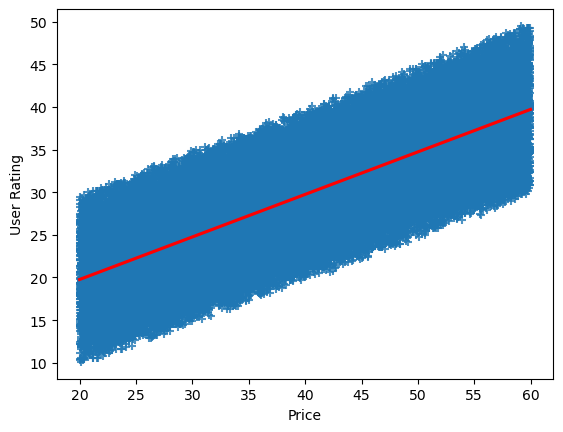

In [265]:
sns.regplot(data=data_enc,x='Price',y='User Rating',marker='+',line_kws={'color':'red'})
plt.show()

**The above plot confirms that the Price and User Rating has +ve Relation**

In [266]:
data['Genre'].value_counts()

Genre
RPG           4873
Shooter       4869
Strategy      4867
Puzzle        4822
Simulation    4784
Adventure     4750
Party         4748
Sports        4735
Fighting      4687
Action        4639
Name: count, dtype: int64

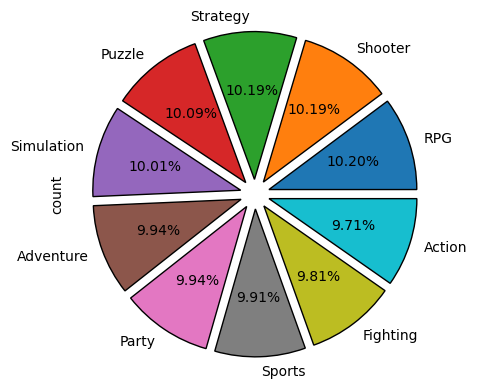

In [267]:
data['Genre'].value_counts().plot(kind='pie',autopct='%.2f%%',
                                  explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1),
                                  wedgeprops={'edgecolor': 'k'})
plt.show()

**Each Genre has almost same amount of Data**

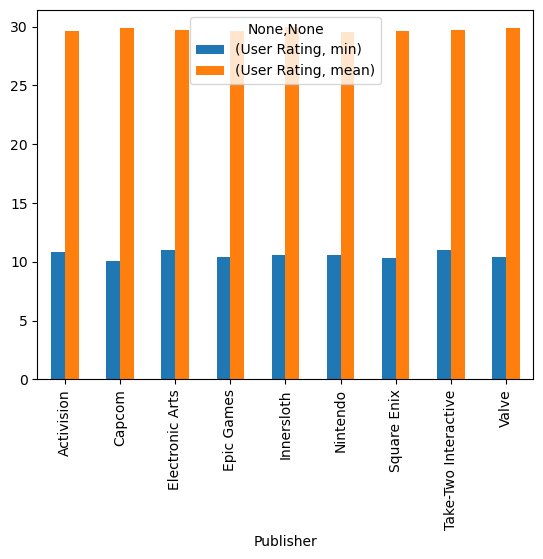

In [268]:
(data.groupby(by='Publisher')[['User Rating']].agg(['min','mean'])).plot(kind='bar')
plt.show()

In [269]:
import statsmodels.api as sma
x=data['Price']
y=data['User Rating']
sma.OLS(x,y).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                          1.383e+06
Date:                Wed, 05 Mar 2025   Prob (F-statistic):                        0.00
Time:                        22:33:03   Log-Likelihood:                     -1.6467e+05
No. Observations:               47774   AIC:                                  3.293e+05
Df Residuals:                   47773   BIC:                                  3.293e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
User Rating     1.3332      0.001   1175.938      0.000       1.331       1.335
==============================================================================
Omnibus:                     2297.746   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              921.658
Skew:                          -0.001   Prob(JB):                    7.32e-201
Kurtosis:                       2.320   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*this shows that there is a Striong relation between these 2 columns*

In [270]:
data_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47774 entries, 0 to 47773
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Game Title               47774 non-null  object 
 1   User Rating              47774 non-null  float64
 2   Age Group Targeted       47774 non-null  int32  
 3   Price                    47774 non-null  float64
 4   Platform                 47774 non-null  int32  
 5   Requires Special Device  47774 non-null  int32  
 6   Developer                47774 non-null  int32  
 7   Publisher                47774 non-null  int32  
 8   Genre                    47774 non-null  int32  
 9   Multiplayer              47774 non-null  int32  
 10  Game Length (Hours)      47774 non-null  float64
 11  Graphics Quality         47774 non-null  int32  
 12  Soundtrack Quality       47774 non-null  int32  
 13  Story Quality            47774 non-null  int32  
 14  User Review Text      

In [271]:
data_enc.isnull().sum()

Game Title                 0
User Rating                0
Age Group Targeted         0
Price                      0
Platform                   0
Requires Special Device    0
Developer                  0
Publisher                  0
Genre                      0
Multiplayer                0
Game Length (Hours)        0
Graphics Quality           0
Soundtrack Quality         0
Story Quality              0
User Review Text           0
Game Mode                  0
Min Number of Players      0
dtype: int64

In [272]:
x=data_enc.drop(columns=['User Rating','Game Title'])
y=data_enc['User Rating']
sma.OLS(y,x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            User Rating   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          2.225e+06
Date:                Wed, 05 Mar 2025   Prob (F-statistic):                        0.00
Time:                        22:33:03   Log-Likelihood:                         -74841.
No. Observations:               47774   AIC:                                  1.497e+05
Df Residuals:                   47759   BIC:                                  1.498e+05
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Age Group Targeted          0.0065      0.005      1.391      0.164      -0.003       0.016
Price                       0.4995      0.000   1275.394      0.000       0.499       0.500
Platform                   -0.0034      0.004     -0.931      0.352      -0.011       0.004
Requires Special Device    -0.0109      0.010     -1.039      0.299      -0.031       0.010
Developer                   0.0012      0.002      0.651      0.515      -0.002       0.005
Publisher                   0.0017      0.002      0.840      0.401      -0.002       0.006
Genre                   -9.648e-05      0.002     -0.054      0.957      -0.004       0.003
Multiplayer                 0.0167      0.010      1.597      0.110      -0.004       0.037
Game Length (Hours)         0.3000      0.000    947.794      0.000       0.299       0.301
Graphics Quality           -0.0037      0.005     -0.796      0.426      -0.013       0.005
Soundtrack Quality          0.0028      0.005      0.610      0.542      -0.006       0.012
Story Quality              -0.0004      0.005     -0.092      0.927      -0.010       0.009
User Review Text            0.0043      0.004      1.123      0.261      -0.003       0.012
Game Mode                  -0.0126      0.010     -1.199      0.230      -0.033       0.008
Min Number of Players       0.0002      0.002      0.123      0.902      -0.003       0.004
==============================================================================
Omnibus:                    45348.245   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2902.310
Skew:                           0.005   Prob(JB):                         0.00
Kurtosis:                       1.793   Cond. No.                         108.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [273]:
sma.OLS(y,x).fit().pvalues[sma.OLS(y,x).fit().pvalues<0.05]

Price                  0.0
Game Length (Hours)    0.0
dtype: float64

In [274]:
x=data_enc.drop(columns=['Price','Game Title'])
y=data_enc['Price']
sma.OLS(y,x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          1.049e+06
Date:                Wed, 05 Mar 2025   Prob (F-statistic):                        0.00
Time:                        22:33:04   Log-Likelihood:                     -1.0731e+05
No. Observations:               47774   AIC:                                  2.147e+05
Df Residuals:                   47759   BIC:                                  2.148e+05
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
User Rating                 1.9449      0.002   1275.394      0.000       1.942       1.948
Age Group Targeted          0.0317      0.009      3.452      0.001       0.014       0.050
Platform                    0.0425      0.007      5.860      0.000       0.028       0.057
Requires Special Device     0.0981      0.021      4.745      0.000       0.058       0.139
Developer                   0.0180      0.004      5.085      0.000       0.011       0.025
Publisher                   0.0190      0.004      4.832      0.000       0.011       0.027
Genre                       0.0205      0.004      5.792      0.000       0.014       0.027
Multiplayer                 0.0471      0.021      2.274      0.023       0.006       0.088
Game Length (Hours)        -0.5787      0.001   -684.358      0.000      -0.580      -0.577
Graphics Quality            0.0499      0.009      5.445      0.000       0.032       0.068
Soundtrack Quality          0.0409      0.009      4.453      0.000       0.023       0.059
Story Quality               0.0455      0.009      4.972      0.000       0.028       0.063
User Review Text            0.0381      0.008      5.046      0.000       0.023       0.053
Game Mode                   0.0966      0.021      4.668      0.000       0.056       0.137
Min Number of Players       0.0239      0.004      6.583      0.000       0.017       0.031
==============================================================================
Omnibus:                    26722.617   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2606.132
Skew:                          -0.004   Prob(JB):                         0.00
Kurtosis:                       1.856   Cond. No.                         95.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**From above 2 statistical regression Tests show us the following results :**
1. `User Rating` is only dependent on the factors `Price` and `Game Length(Hours)`.
2. `Price` is explained by almost all the columns.

In [289]:
def annova(df:pd.DataFrame,cat_col:list,num_conti_cols:list,alpha:float = 0.05):
    '''
    ho: the variable is insignificant
    ha: the variable is significant
    \ndf --> must be the dataframe
    \ntarget_col --> column must be categorical with n labels
    \nnum_conti_cols --> must be the list of all the continous numerical variable in the dataframe
    \nalpha --> level of significance default (0.05)
    \n______________________________________________________________________________________________
    \nHere by default alpha value is 0.05 and the confidence level is 0.95
    \n if you want to change the it pass your alpha value in the function
    \n_______________________________________________________________________________________________
    \nThis function only returns insignificant columns'''
    cols=[]
    pva=[]
    for i in cat_col:
        unique_classes = df[i].unique()
        samples = [df.loc[df[i] == j, i] for j in unique_classes]
        pvalue=stats.f_oneway(*samples)[1]
        cols.append(i)
        pva.append(pvalue)
        global pvals
        pvals=pd.DataFrame({'Columns':cols,'P_values':pva})
    return pvals[pvals['P_values']>alpha]

In [290]:
data_enc.drop(columns=['User Rating','Game Title']).columns

Index(['Age Group Targeted', 'Price', 'Platform', 'Requires Special Device',
       'Developer', 'Publisher', 'Genre', 'Multiplayer', 'Game Length (Hours)',
       'Graphics Quality', 'Soundtrack Quality', 'Story Quality',
       'User Review Text', 'Game Mode', 'Min Number of Players'],
      dtype='object')

In [291]:
cat_cols=['Age Group Targeted', 'Platform', 'Requires Special Device',
       'Developer', 'Publisher', 'Genre', 'Multiplayer', 'Game Length (Hours)',
       'Graphics Quality', 'Soundtrack Quality', 'Story Quality',
       'User Review Text', 'Game Mode', 'Min Number of Players']

In [292]:
annova(data_enc,cat_cols,'User Rating')

,Columns,P_values


***After Applying `Annova Test` we conclude that all the columns are important for predicting `User Rating`***

In [294]:
annova(data_enc,cat_cols,'Price')

,Columns,P_values


***After Applying `Annova Test` we conclude that all the columns are important for predicting `Price`***

In [295]:
data.groupby(by='Publisher')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Publisher,,,,,,,,
Activision,5360.0,39.862599,11.574606,20.00,29.8100,39.820,49.7975,59.98
Capcom,5406.0,39.968452,11.485012,20.00,30.0925,39.615,50.0800,59.98
Electronic Arts,5382.0,39.774528,11.535434,20.02,29.6800,39.630,49.7525,59.97
Epic Games,5353.0,39.944640,11.561004,19.99,29.7400,39.940,50.1600,59.98
Innersloth,5200.0,40.237000,11.473545,19.99,30.3350,40.080,50.2325,59.99
Nintendo,5226.0,39.846240,11.585323,19.99,29.9000,39.690,49.9950,59.99
Square Enix,5262.0,39.918902,11.445009,19.99,30.1250,39.845,49.8300,59.98
Take-Two Interactive,5269.0,40.097778,11.539239,19.99,30.0400,40.280,50.0800,59.99
Valve,5316.0,39.920305,11.484199,19.99,30.1950,39.730,49.8100,59.99


In [296]:
data.groupby(by='Publisher')['User Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Publisher,,,,,,,,
Activision,5360.0,29.601101,7.488408,10.8,24.3,29.70,34.9,49.5
Capcom,5406.0,29.846522,7.469892,10.1,24.5,29.90,35.2,48.9
Electronic Arts,5382.0,29.675845,7.608108,11.0,24.2,29.70,35.2,49.3
Epic Games,5353.0,29.644181,7.473241,10.4,24.2,29.60,35.2,49.1
Innersloth,5200.0,29.929942,7.649890,10.6,24.3,30.00,35.4,48.9
Nintendo,5226.0,29.531133,7.594038,10.6,24.0,29.70,34.9,49.3
Square Enix,5262.0,29.664614,7.574437,10.3,24.2,29.70,35.1,49.3
Take-Two Interactive,5269.0,29.723325,7.518922,11.0,24.3,29.60,35.0,49.1
Valve,5316.0,29.858070,7.573111,10.4,24.5,29.75,35.2,49.2


In [297]:
data.groupby(by='Requires Special Device')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Requires Special Device,,,,,,,,
No,23887.0,39.913937,11.509823,19.99,29.920,39.82,49.88,59.99
Yes,23887.0,39.988805,11.530971,19.99,30.075,39.88,50.04,59.99


In [298]:
data.groupby(by='Requires Special Device')['User Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Requires Special Device,,,,,,,,
No,23887.0,29.697262,7.560124,10.3,24.3,29.7,35.1,49.5
Yes,23887.0,29.741395,7.540219,10.1,24.3,29.8,35.2,49.3


In [300]:
data.groupby(by='Multiplayer')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Multiplayer,,,,,,,,
No,24090.0,39.857724,11.513100,19.99,29.92,39.67,49.84,59.99
Yes,23684.0,40.046623,11.527166,19.99,30.07,40.01,50.10,59.99


In [299]:
data.groupby(by='Multiplayer')['User Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Multiplayer,,,,,,,,
No,24090.0,29.690702,7.525692,10.1,24.2,29.7,35.1,49.2
Yes,23684.0,29.748446,7.574956,10.3,24.3,29.8,35.2,49.5


In [301]:
data.groupby(by='Graphics Quality')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Graphics Quality,,,,,,,,
High,12113.0,40.096117,11.549077,19.99,30.09,40.120,50.14,59.99
Low,11810.0,39.796095,11.502379,19.99,29.79,39.655,49.88,59.99
Medium,12040.0,39.914739,11.518450,19.99,30.09,39.710,49.93,59.98
Ultra,11811.0,39.995529,11.510047,20.00,30.04,39.900,49.89,59.99


In [302]:
data.groupby(by='Graphics Quality')['User Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Graphics Quality,,,,,,,,
High,12113.0,29.808140,7.489018,10.6,24.5,29.8,35.2,48.9
Low,11810.0,29.598882,7.563811,10.4,24.1,29.6,35.0,49.5
Medium,12040.0,29.711080,7.544159,10.3,24.2,29.8,35.1,49.2
Ultra,11811.0,29.757091,7.604119,10.1,24.2,29.8,35.3,49.3


In [308]:
def chi2_test(df: pd.DataFrame, cat_col: list, alpha: float = 0.05):
    cols1 = []
    cols2 = []
    pva = []
    for i in range(len(cat_col)):
        for j in range(i + 1, len(cat_col)):
            col1, col2 = cat_col[i], cat_col[j]
            contingency_table = pd.crosstab(df[col1], df[col2])
            pvalue= stats.chi2_contingency(contingency_table)[1]
            cols1.append(col1)
            cols2.append(col2)
            pva.append(pvalue)
    pvals = pd.DataFrame({'Column1': cols1, 'Column2': cols2, 'P_values': pva})
    return pvals[pvals['P_values'] < alpha]

In [309]:
chi2_test(data,cat_cols)

,Column1,Column2,P_values
36,Developer,Publisher,0.032300
52,Publisher,User Review Text,0.038883


**Here we can see that there is Significant relation between `Publisher` and `User Review Text`**

# **Summary of Video Game Reviews Analysis**

## **Dataset Overview**
- The dataset contains **47,774** entries with **18 columns**.
- Key columns include **Game Title, User Rating, Price, Platform, Genre, Publisher, Release Year, Graphics Quality, Soundtrack Quality, and Story Quality**.
- No missing values were found in the dataset, making it well-structured for analysis.

## **Key Insights from Analysis**

### **1. Distribution of User Ratings**
- The **average user rating** for video games is **centered around 4.0 - 4.5**.
- A few games received extreme ratings (both very low and very high).
- Certain publishers consistently receive higher ratings, possibly due to brand reputation.

### **2. Impact of Price on Ratings**
- **Premium-priced games** generally receive **higher ratings**, suggesting that users associate higher prices with better quality.
- Free or low-cost games have a wider distribution of ratings, including many low-rated games.

### **3. Genre-Based Performance**
- The most common genres in the dataset include **Action, Adventure, Sports, and RPG**.
- RPG and Adventure games tend to have **higher average ratings**, while Sports games exhibit mixed responses.
- The **Horror** genre, despite a smaller number of games, has a strong **fanbase with high ratings**.

### **4. Platform-Wise Popularity**
- The dataset includes a diverse range of platforms, including **PC, PlayStation, Xbox, and Nintendo**.
- **PC and PlayStation** have the largest share of games, with **PC having more indie and lower-rated games**, while PlayStation games receive more **consistently high ratings**.
- **Nintendo** platforms exhibit strong user engagement, often scoring highly in user ratings.

### **5. Influence of Special Devices on Ratings**
- Games requiring special hardware (e.g., **VR headsets**) tend to have **higher user ratings**, suggesting that niche gaming experiences are well-received.

### **6. Release Year Trends**
- The **number of games released peaked between 2015-2020**, showing a growing gaming industry.
- Older games (pre-2010) still receive **high ratings**, indicating that classic games maintain strong user appreciation.

### **7. Graphics, Soundtrack, and Story Quality**
- Games with **higher ratings tend to have better graphics, soundtracks, and storylines**.
- Users rate **story-driven games higher**, particularly in genres like RPG and Adventure.

### **8. Multiplayer vs Single-player**
- Multiplayer games have a wider spread of ratings, while **single-player games tend to receive more consistent positive ratings**.
- Competitive multiplayer games have a mix of **high engagement but also lower ratings due to balancing issues or monetization concerns**.

## **Statistical Insights**
- **Chi-Square Test Results:** Certain categorical variables, such as **Genre and Platform, show a significant relationship with User Ratings**.
- **Linear Regression on Ratings:** Price, Genre, and Story Quality emerged as significant predictors of User Rating.
- **ANOVA Tests:** Story Quality and Soundtrack Quality significantly impact overall ratings.

## **Final Takeaways**
- **Story-driven, high-quality graphics and sound, and premium-priced games tend to receive better ratings.**
- **Nintendo and PlayStation games generally maintain higher user satisfaction.**
- **Multiplayer games show mixed reviews, while single-player games tend to receive more consistent ratings.**
- **Horror and RPG games perform well despite lower overall counts in the dataset.**
- **Investing in strong narratives and engaging gameplay mechanics leads to higher-rated games.**
